# Shapiro's Model Inference for Neural Network Explainability

This notebook demonstrates how to use Shapiro's Model Inference Algorithm (1981) to learn logical rules that explain the behavior of a black-box neural network.


## 1. Setup and Imports


In [5]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import numpy as np
import matplotlib.pyplot as plt

from src.models.nn_model import SimpleNNClassifier, generate_synthetic_loan_data
from src.models.model_wrapper import (
    wrap_nn,
    create_instances_from_data,
    generate_facts_from_instances
)
from src.inference.algorithm import ModelInference
from src.core.atoms import Atom, Constant
from src.utils.visualization import (
    plot_theory_evolution,
    display_rules,
    plot_rule_coverage,
    plot_rule_accuracy
)


## 2. Generate Synthetic Data


In [ ]:
# Generate synthetic loan approval data
X, y, feature_names = generate_synthetic_loan_data(n_samples=500, random_state=42)

print(f"Generated {len(X)} samples")
print(f"Features: {feature_names}")
print(f"Class distribution: {np.bincount(y)}")


Generated 500 samples
Features: ['income', 'credit_score', 'age', 'employment_years']
Class distribution: [403  97]


## 3. Train Neural Network


In [8]:
# Create and train the model
model = SimpleNNClassifier(input_size=len(feature_names), hidden_sizes=[32, 16])
history = model.train_model(X, y, epochs=50, verbose=True)

print(f"\nFinal validation accuracy: {history['val_acc'][-1]:.4f}")


Epoch 10/50 - Train Loss: 0.4407, Val Loss: 0.3929, Val Acc: 0.8400
Epoch 20/50 - Train Loss: 0.4111, Val Loss: 0.3584, Val Acc: 0.8500
Epoch 30/50 - Train Loss: 0.3990, Val Loss: 0.3508, Val Acc: 0.8500
Epoch 40/50 - Train Loss: 0.3896, Val Loss: 0.3462, Val Acc: 0.8600
Epoch 50/50 - Train Loss: 0.3803, Val Loss: 0.3420, Val Acc: 0.8500

Final validation accuracy: 0.8500


## 4. Set Up Oracle


In [ ]:
# Create instances from data
instances = create_instances_from_data(X, feature_names, discretize=True)
label_map = {"APPROVED": 1, "DENIED": 0}

# Wrap model as oracle
oracle = wrap_nn(model, instances, feature_names, label_map)

print(f"Created {len(instances)} instances")
print(f"Oracle ready")


Created 500 instances
Oracle ready


## 5. Generate Observation Facts


In [ ]:
# Generate facts from instances
train_indices = list(range(100))  # Use first 100 instances
facts = generate_facts_from_instances(
    instances, model, feature_names, label_map, instance_ids=train_indices
)

# Filter to prediction facts
predict_facts = [f for f in facts if f.predicate == "predict"]

print(f"Generated {len(facts)} total facts")
print(f"Using {len(predict_facts)} prediction facts for learning")

# Show some examples
print("\nExample facts:")
for fact in predict_facts[:5]:
    print(f"  {fact}")


Generated 500 total facts
Using 100 prediction facts for learning

Example facts:
  predict(0, DENIED)
  predict(1, DENIED)
  predict(2, DENIED)
  predict(3, DENIED)
  predict(4, DENIED)


## 6. Run Model Inference


In [ ]:
# Run the inference algorithm
inference = ModelInference(oracle, max_iterations=20, max_theory_size=20)
theory = inference.infer_theory(iter(predict_facts))

print(f"Learned theory with {len(theory)} clauses")


Learned theory with 0 clauses


## 7. Display Learned Rules


In [ ]:
display_rules(theory)



Learned Theory (0 clauses)

  (Empty theory)


## 8. Visualize Theory Evolution


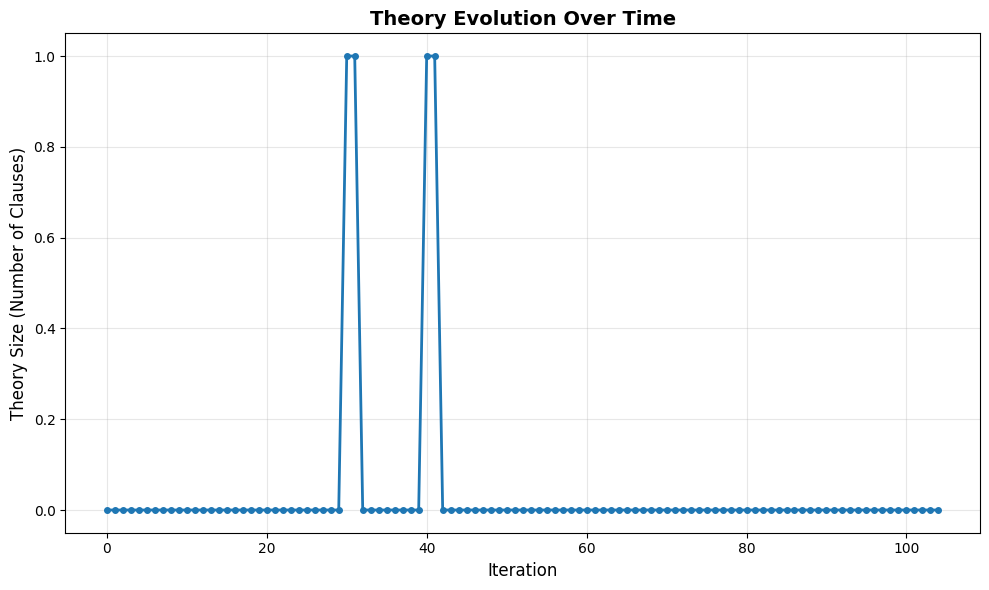

In [ ]:
history = inference.get_history()
plot_theory_evolution(history)


## 9. Evaluate Rule Coverage and Accuracy


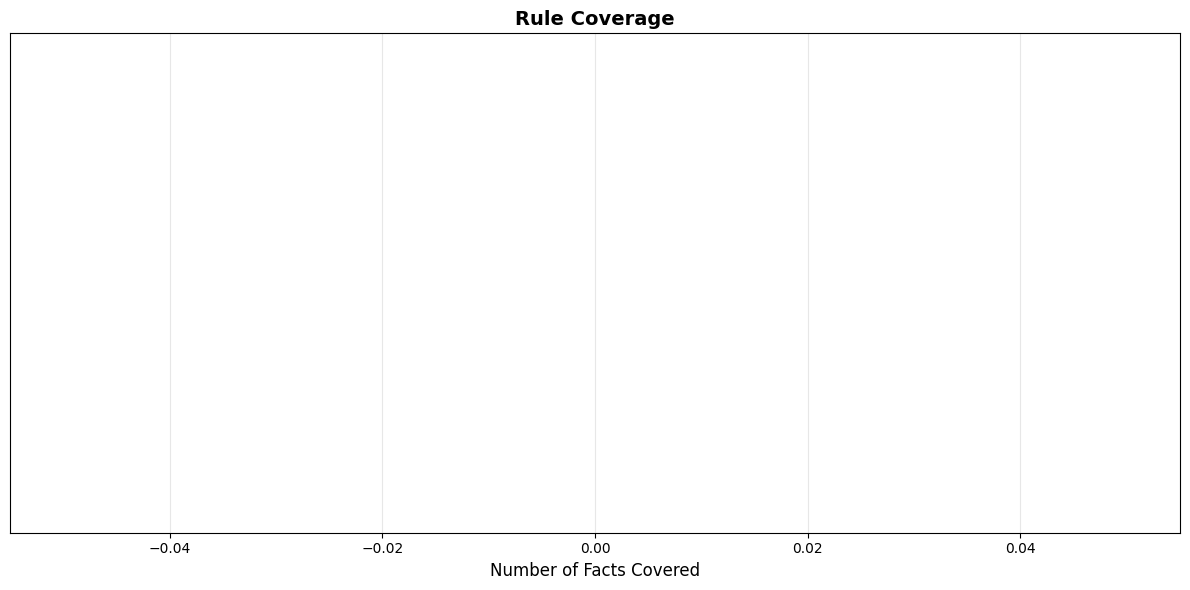

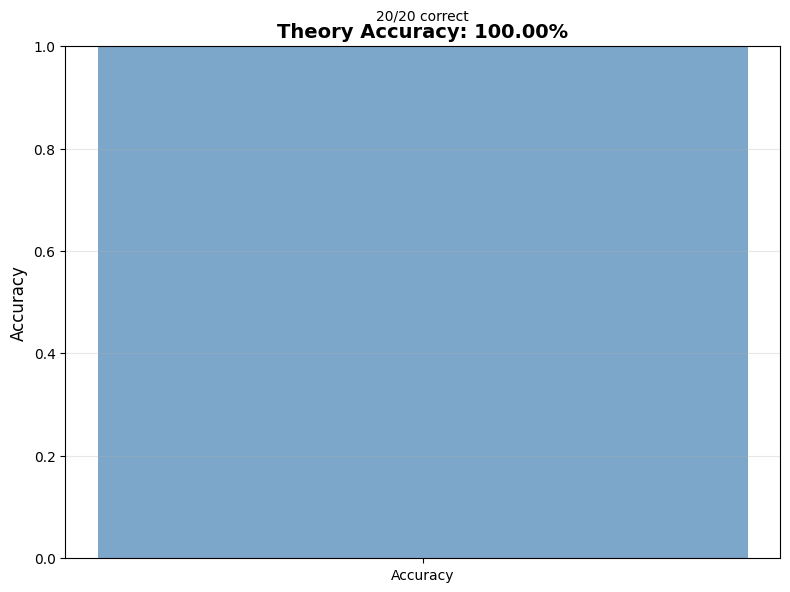

{'accuracy': 1.0, 'correct': 20, 'total': 20}

In [ ]:
# Evaluate on test set
test_facts = predict_facts[:20]

plot_rule_coverage(theory, test_facts, oracle)
plot_rule_accuracy(theory, test_facts, oracle)


## Summary

This demo showed how to:
1. Train a neural network classifier
2. Convert it to an oracle
3. Generate observation facts
4. Learn logical rules using Shapiro's Algorithm 2
5. Visualize and evaluate the learned rules
